In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='white')

In [6]:
path = "../processed/perplexity/perplexity_498_18_03_2024.csv"

In [7]:
df = pd.read_csv(path)

In [8]:
df.head(3)

,id,instructions,text,kgw-watermarked,non-watermarked,pp-kgw-para-1,pp-unwatermarked-para-1,pp-kgw-para-2,pp-unwatermarked-para-2,pp-kgw-para-3,...,pp-kgw-perc-word-2-ppl,pp-unwatermarked-perc-word-2-ppl,pp-kgw-perc-word-3-ppl,pp-unwatermarked-perc-word-3-ppl,pp-kgw-noun-word-1-ppl,pp-unwatermarked-noun-word-1-ppl,pp-kgw-noun-word-2-ppl,pp-unwatermarked-noun-word-2-ppl,pp-kgw-noun-word-3-ppl,pp-unwatermarked-noun-word-3-ppl
0,9C76CF46D791,\nTask:\n\n1. Research the importance of educa...,Students are expected to identify a career by ...,Title: The Impact of Early Career Commitment ...,Title: The Risks of Premature Career Commitme...,"In the form of counseling, training, and works...",The importance of a high school education lies...,"It is necessary to educate students, to shape ...",The pressure of finding a job at a young age i...,"In addition, there is no clear route to explor...",...,203.876892,128.048721,290.733368,146.087418,104.356346,34.986706,138.394333,60.549328,162.216446,93.570389
1,BAD99FB704BB,\nTask: \n\nWrite a persuasive essay to discus...,Is honesty always the best policy?\n\nAn old p...,title: When Lies Protect: A Case for the Stra...,Title: Honesty: A Double-Edged Sword\n\nHones...,"As to the deception of a person, in the case o...","At such times, dishonesty becomes a means of s...","In truth, truthfulness is largely a strength o...","It's not about being dishonest, it's about nav...","In the case of the deception of a person, for ...",...,239.511841,209.798508,381.075317,226.121719,124.100197,78.298058,134.790070,87.103020,224.777512,96.009933
2,D0A218161D37,\nTask: Consider the value of self-reliance an...,Prompt essay\n\nPeople who value self-reliance...,"Self-reliance, the ability to rely on oneself...",Self-reliance holds significant value in one'...,It is thus possible to gain a balanced view of...,It is essential to achieve balance between sel...,This is a key virtue for self-development and ...,The determination of oneself is an important t...,This is the necessary virtue for self-developm...,...,132.165283,190.015228,152.803589,181.588943,48.954945,44.413040,59.684093,48.468319,87.247925,59.463711


In [9]:
kgw_wm_zscore = np.array(df["kgw-wm-zscore"])
non_wm_zscore = np.array(df["non-wm-zscore"])

In [10]:
no_of_paraphrases = 3
wmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))
nmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))

In [11]:
for i in range(1, no_of_paraphrases+1):
    wmarked_paraphrased_scores[i-1] = df[f"kgw-para-zscore-{i}"]
    nmarked_paraphrased_scores[i-1] = df[f"nowm-para-zscore-{i}"]

In [12]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [13]:
comparison(kgw_wm_zscore, non_wm_zscore)

base mean: 12.4047, pp mean: 0.0805
base std: 3.1947, pp mean: 0.9533


## Scatter Plot Visualisation

In [14]:
image_path = "../results/recursive-word-paraphrasing/"

sns.set_theme(style='white')

In [19]:
sns.set_palette("pastel")
pp_type = "perc-word"
sampled_df = df

kgw_z_scores = sampled_df["kgw-wm-zscore"]
kgw_pp_z_scores = sampled_df[f"kgw-{pp_type}-zscore-1"]

z_threshold = 4.0

C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


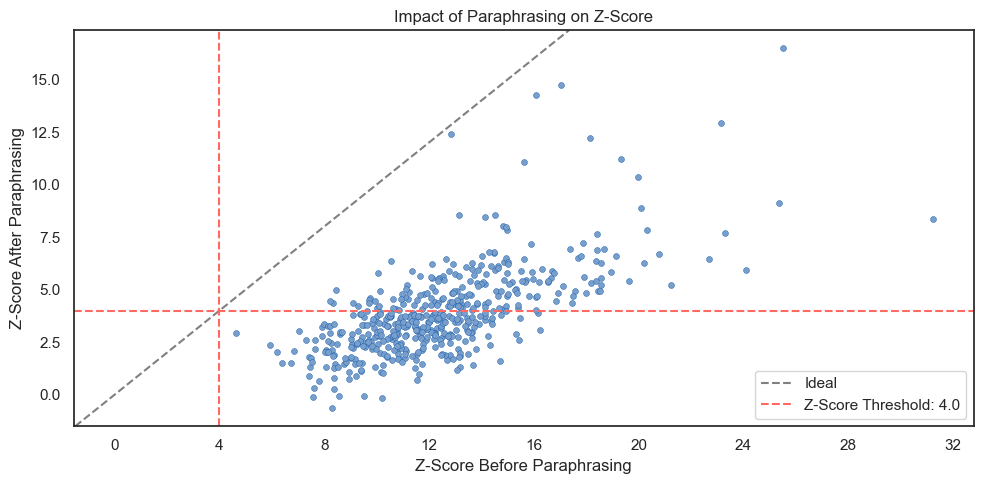

In [20]:
fig, axs = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=kgw_z_scores, y=kgw_pp_z_scores, ax=axs, color='#789FCC', edgecolor="#1E60AD", s=18)

axs.set_xlabel("Z-Score Before Paraphrasing")
axs.set_ylabel("Z-Score After Paraphrasing")

left = min(0, np.min(kgw_z_scores)-1)
right = max(kgw_z_scores)+1
bottom = min(0, np.min(kgw_pp_z_scores)-1)
top = max(kgw_pp_z_scores) + 1

axs.axline((0,0), slope=1, linestyle='--', label='Ideal', color='gray')

# axs.set_xlim(left=left, right=right)
# axs.set_ylim(bottom=bottom, top=top)
axs.axhline(z_threshold, label='Z-Score Threshold: 4.0', color='#FF6961', linestyle='--')
axs.axvline(z_threshold, color='#FF6961', linestyle='--')

axs.set_xticks(list(range(0, np.ceil(right).astype(np.int32), 4)))

axs.set_title("Impact of Paraphrasing on Z-Score")
axs.grid(which='minor')

plt.legend()
plt.tight_layout()

# plt.savefig(f"{image_path}/z-score-comparison.pdf", bbox_inches='tight', format='pdf')

plt.show()

In [13]:
sns.set_theme(style='white')

In [183]:
sampled_df = df.sample(100).reset_index()

kgw_z_scores = sampled_df["kgw-wm-zscore"]
kgw_pp_z_scores = sampled_df["kgw-sent-zscore-1"]

ordering = np.argsort(kgw_z_scores)[::-1]
kgw_z_scores = kgw_z_scores[ordering]
kgw_pp_z_scores = kgw_pp_z_scores[ordering]

z_threshold = 4.0

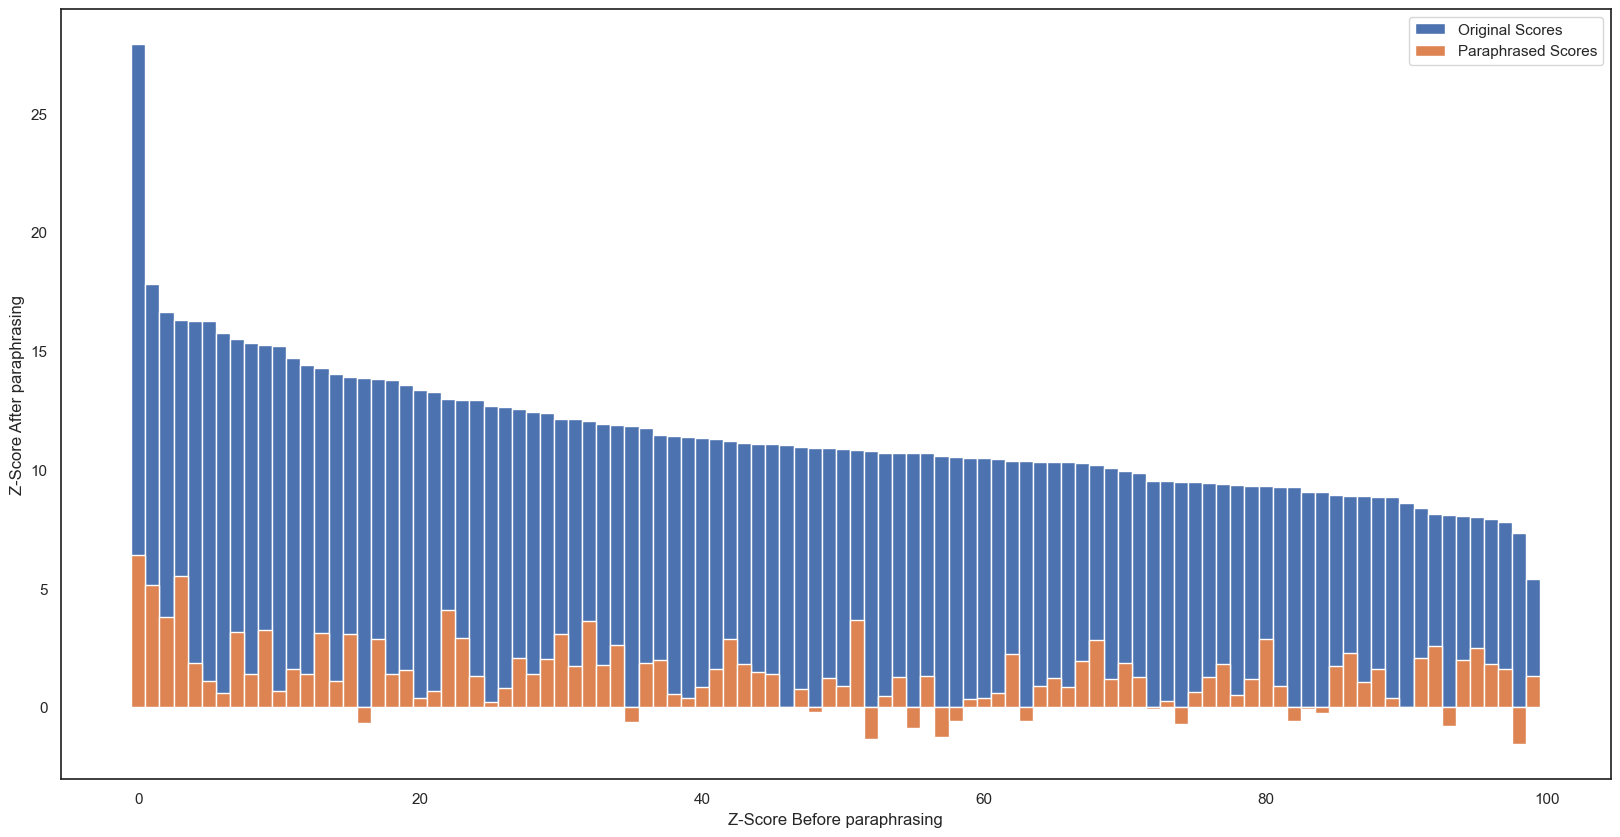

In [184]:
fig, axs = plt.subplots(figsize=(20, 10))

axs.bar(x=list(range(kgw_z_scores.shape[0])), height=kgw_z_scores, width=1, label='Original Scores')
axs.bar(x=list(range(kgw_z_scores.shape[0])), height=kgw_pp_z_scores, width=1, label='Paraphrased Scores')
# sns.barplot(x=list(range(kgw_z_scores.shape[0])), y=kgw_z_scores, ax=axs)

axs.set_xlabel("Z-Score Before paraphrasing")
axs.set_ylabel("Z-Score After paraphrasing")

plt.legend()

plt.show()